# Tokenization

Tokenization is at the heart of much weirdness of LLMs. Do not brush it off.

**Why can't LLM spell words**  
LLMs see words as token chunks, not letter by letter, so unusual spellings may split into strange token combinations the model hasn't seen together often.  

**Why can't LLM do super simple string processing tasks like reversing a string**  
LLMs process text as tokens, not individual characters, making character-by-character operations like string reversal difficult.  

**Why is LLM worse at non-English languages (e.g. Japanese)**  
Languages like Japanese tokenize inefficiently, often requiring more tokens per word than English, giving the model less context to work with.  

**Why is LLM bad at simple arithmetic**  
Numbers get split into multiple tokens based on digit patterns, making it harder for the model to understand numerical relationships.  

**Why did GPT-2 have more than necessary trouble coding in Python**  
Code tokens were less common in GPT-2's training data, and programming syntax often gets split in unintuitive ways. For example, indentation spaces occupy a huge part of the context window.  

**Why did my LLM abruptly halt when it sees the string "<|endoftext|>"**  
This specific string is a special token used during training to mark the end of documents, so models interpret it as a signal to stop generating.  

**Why does the LLM break if I ask it about "SolidGoldMagikarp"**  
This specific string became famous because in early GPT models, it tokenized into an unusual pattern that caused the model to produce repetitive or nonsensical outputs. A hypothesis is that it's related to a Reddit username.  

**Why should I prefer to use YAML over JSON with LLMs**  
YAML formatting creates more natural language-like tokens than JSON's special characters and strict syntax.  



Good tokenization web app: [https://tiktokenizer.vercel.app](https://tiktokenizer.vercel.app)


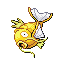

_____

## Byte-pair encoding

https://en.wikipedia.org/wiki/Byte_pair_encoding

In [1]:
#As usual, i change the original text just for fun
# Using this awesome bit of James Donald Forbes McCann --> https://www.youtube.com/watch?v=udSMZG_L-S0
text="Fool me once, shame on you. Fool me twice, shame on me. Fool me three times, there's twice as much shame on me. I cannot believe I allowed you to fool me again. Definitely learned from the first time not to be fooled. Fool me four times, shame back on you, actually. You are picking on a vulnerable man; something has obviously gone wrong with me. This is like bullying the kid in a wheelchair at primary school. It's like bullying the fat kid, bullying the kid with a limp. Four times? You're gonna fool me? Unbelievable. Fool me five times, shame on me again. I mean, I'm vulnerable, but at some point, you have to take some personal responsibility, for crying out loud. I've got twelve of these; they're good for eight. Fool me six times—probably six times—a fool. And I have lured you into my trap, pretending to be a fool six consecutive times to give you a false sense of security, only to flip it, and now you are the fool, and you have the shame. Fool me seven times, you saw through my trick, but there's no shame, because I'm getting fooled by the best. Fool me eight times, and this is no longer fooling—this is systematic cruelty. And rather than allocating shame or even looking at you as an individual, I'd like you to unpack the nature of your fooling, remove the fool privilege that you're bringing to the situation, and build a freer world for us all. But fool me nine times—well, that's one time too many, and I will rise up with all the other members of the Foolertariat to install a dictatorship of the fools and wipe out the people who have been fooling us. But fool me ten times—the revolution goes awry, just in a sort of Stalin-taking-over-the-USSR type situation."


tokens = text.encode("utf-8") # raw bytes
tokens = list(map(int, tokens)) # convert to a list of integers in range 0..255 for convenience
print('---')
print(text)
print("length:", len(text))
print('---')
print(tokens)
print("length:", len(tokens))

---
Fool me once, shame on you. Fool me twice, shame on me. Fool me three times, there's twice as much shame on me. I cannot believe I allowed you to fool me again. Definitely learned from the first time not to be fooled. Fool me four times, shame back on you, actually. You are picking on a vulnerable man; something has obviously gone wrong with me. This is like bullying the kid in a wheelchair at primary school. It's like bullying the fat kid, bullying the kid with a limp. Four times? You're gonna fool me? Unbelievable. Fool me five times, shame on me again. I mean, I'm vulnerable, but at some point, you have to take some personal responsibility, for crying out loud. I've got twelve of these; they're good for eight. Fool me six times—probably six times—a fool. And I have lured you into my trap, pretending to be a fool six consecutive times to give you a false sense of security, only to flip it, and now you are the fool, and you have the shame. Fool me seven times, you saw through my t

In [2]:
def get_stats(ids):
    """
    Counts occurrences of consecutive element pairs in the given list.
    """
    
    counts = {}  # Dictionary to store the count of each consecutive pair
    
    # Iterate through consecutive elements
    for pair in zip(ids, ids[1:]):  
        counts[pair] = counts.get(pair, 0) + 1  # Increment the count for the pair, initializing to 0 if not present
    
    return counts 

stats = get_stats(tokens)
#print(stats)
print(sorted(((value,key) for key,value in stats.items()), reverse=True))

[(74, (101, 32)), (55, (32, 116)), (42, (109, 101)), (33, (116, 104)), (30, (32, 97)), (27, (111, 111)), (27, (105, 110)), (25, (111, 108)), (25, (44, 32)), (25, (32, 102)), (23, (104, 101)), (23, (32, 115)), (23, (32, 109)), (22, (111, 117)), (20, (116, 105)), (20, (32, 111)), (19, (116, 32)), (19, (111, 110)), (19, (46, 32)), (18, (115, 32)), (18, (110, 103)), (18, (108, 32)), (18, (102, 111)), (18, (100, 32)), (17, (104, 97)), (15, (114, 101)), (15, (110, 32)), (15, (105, 109)), (15, (101, 115)), (15, (32, 98)), (14, (118, 101)), (14, (111, 32)), (14, (97, 116)), (13, (121, 111)), (13, (103, 32)), (13, (32, 121)), (12, (116, 111)), (12, (114, 32)), (12, (108, 105)), (12, (101, 114)), (12, (97, 110)), (11, (108, 108)), (10, (117, 32)), (10, (110, 100)), (10, (97, 108)), (10, (97, 32)), (10, (70, 111)), (10, (32, 73)), (9, (115, 104)), (9, (115, 101)), (9, (108, 101)), (9, (105, 116)), (9, (32, 119)), (9, (32, 108)), (9, (32, 105)), (9, (32, 70)), (8, (121, 32)), (8, (117, 116)), (8, 

In [3]:
chr(101), chr(32)

('e', ' ')

In [4]:
def merge(ids, pair, idx):
  # in the list of ints (ids), replace all consecutive occurences of pair with the new token idx
  newids = []
  i = 0
  while i < len(ids):
    # if we are not at the very last position AND the pair matches, replace it
    if i < len(ids) - 1 and ids[i] == pair[0] and ids[i+1] == pair[1]:
      newids.append(idx)
      i += 2
    else:
      newids.append(ids[i])
      i += 1
  return newids

top_pair = max(stats, key=stats.get)
tokens2 = merge(tokens, top_pair, 256)
print(tokens2)
print("length:", len(tokens2))

[70, 111, 111, 108, 32, 109, 256, 111, 110, 99, 101, 44, 32, 115, 104, 97, 109, 256, 111, 110, 32, 121, 111, 117, 46, 32, 70, 111, 111, 108, 32, 109, 256, 116, 119, 105, 99, 101, 44, 32, 115, 104, 97, 109, 256, 111, 110, 32, 109, 101, 46, 32, 70, 111, 111, 108, 32, 109, 256, 116, 104, 114, 101, 256, 116, 105, 109, 101, 115, 44, 32, 116, 104, 101, 114, 101, 39, 115, 32, 116, 119, 105, 99, 256, 97, 115, 32, 109, 117, 99, 104, 32, 115, 104, 97, 109, 256, 111, 110, 32, 109, 101, 46, 32, 73, 32, 99, 97, 110, 110, 111, 116, 32, 98, 101, 108, 105, 101, 118, 256, 73, 32, 97, 108, 108, 111, 119, 101, 100, 32, 121, 111, 117, 32, 116, 111, 32, 102, 111, 111, 108, 32, 109, 256, 97, 103, 97, 105, 110, 46, 32, 68, 101, 102, 105, 110, 105, 116, 101, 108, 121, 32, 108, 101, 97, 114, 110, 101, 100, 32, 102, 114, 111, 109, 32, 116, 104, 256, 102, 105, 114, 115, 116, 32, 116, 105, 109, 256, 110, 111, 116, 32, 116, 111, 32, 98, 256, 102, 111, 111, 108, 101, 100, 46, 32, 70, 111, 111, 108, 32, 109, 256, 10

i keep the original text

In [5]:
def get_stats(ids):
    counts = {}
    for pair in zip(ids, ids[1:]):
        counts[pair] = counts.get(pair, 0) + 1
    return counts

def merge(ids, pair, idx):
  newids = []
  i = 0
  while i < len(ids):
    if i < len(ids) - 1 and ids[i] == pair[0] and ids[i+1] == pair[1]:
      newids.append(idx)
      i += 2
    else:
      newids.append(ids[i])
      i += 1
  return newids

# ---
vocab_size = 276 # the desired final vocabulary size
num_merges = vocab_size - 256
ids = list(tokens) # copy so we don't destroy the original list

merges = {} # (int, int) -> int
for i in range(num_merges):
  stats = get_stats(ids)
  pair = max(stats, key=stats.get)
  idx = 256 + i
  print(f"Merge #{i} {pair} `{chr(pair[0])}{chr(pair[1])}` --> {idx} `{chr(idx)}`")
  ids = merge(ids, pair, idx)
  merges[pair] = idx

Merge #0 (101, 32) `e ` --> 256 `Ā`
Merge #1 (32, 116) ` t` --> 257 `ā`
Merge #2 (111, 111) `oo` --> 258 `Ă`
Merge #3 (105, 110) `in` --> 259 `ă`
Merge #4 (32, 97) ` a` --> 260 `Ą`
Merge #5 (258, 108) `Ăl` --> 261 `ą`
Merge #6 (32, 109) ` m` --> 262 `Ć`
Merge #7 (111, 117) `ou` --> 263 `ć`
Merge #8 (111, 110) `on` --> 264 `Ĉ`
Merge #9 (46, 32) `. ` --> 265 `ĉ`
Merge #10 (257, 104) `āh` --> 266 `Ċ`
Merge #11 (44, 32) `, ` --> 267 `ċ`
Merge #12 (100, 32) `d ` --> 268 `Č`
Merge #13 (259, 103) `ăg` --> 269 `č`
Merge #14 (104, 97) `ha` --> 270 `Ď`
Merge #15 (105, 109) `im` --> 271 `ď`
Merge #16 (101, 115) `es` --> 272 `Đ`
Merge #17 (256, 116) `Āt` --> 273 `đ`
Merge #18 (102, 261) `fą` --> 274 `Ē`
Merge #19 (121, 263) `yć` --> 275 `ē`


In [6]:
print("tokens length:", len(tokens))
print("ids length:", len(ids))
print(f"compression ratio: {len(tokens) / len(ids):.2f}X")

tokens length: 1698
ids length: 1243
compression ratio: 1.37X


The Tokenizer is a completely separate, independent module from the LLM. It has its own training dataset of text (which could be different from that of the LLM), on which you train the vocabulary using the Byte Pair Encoding (BPE) algorithm. It then translates back and forth between raw text and sequences of tokens. The LLM later only ever sees the tokens and never directly deals with any text.

_____
### decoding

Given a sequence of integers in the range [0, vocab_size], what is the text?


In [7]:
vocab = {idx: bytes([idx]) for idx in range(256)}
for (p0, p1), idx in merges.items():
    vocab[idx] = vocab[p0] + vocab[p1]

def decode(ids):
  # given ids (list of integers), return Python string
  tokens = b"".join(vocab[idx] for idx in ids) #concatenate bytes
  text = tokens.decode("utf-8", errors="replace")# errors="strict"
  return text

print(decode([97]))

#not every 

a


___
### encoding

The other way around: Given a string, what are the tokens?


In [8]:
def encode(text):
    """
    Encodes a given string into a list of integer tokens using a merge-based encoding scheme.
    """

    # Convert the input string into a list of UTF-8 byte values (tokens)
    tokens = list(text.encode("utf-8"))

    # Continue merging tokens until no more valid merges exist
    while len(tokens) >= 2:  # Need at least 2 tokens to merge
        # Get the frequency of all consecutive token pairs
        stats = get_stats(tokens)
        # Find the pair with the lowest index in the `merges` dictionary (or inf if not in merges)
        pair = min(stats, key=lambda p: merges.get(p, float("inf")))

        # If the selected pair is not in the `merges` dictionary, stop merging
        if pair not in merges:
            break  

        # Get the index assigned to this pair from the `merges` dictionary
        idx = merges[pair]

        # Merge the selected pair into a single token
        tokens = merge(tokens, pair, idx)

    return tokens  # Return the final list of merged tokens


In [9]:
# Example usages:
print(encode("Fool me once"))  # Should return an empty list since input is empty
print("".join(chr(c) for c in encode("Fool me once"))) 
print(decode(encode("Fool me once")))

[70, 261, 262, 256, 264, 99, 101]
FąĆĀĈce
Fool me once


In [10]:
text2 = decode(encode(text))
print(text2 == text)

True


In [11]:
# trying with another bit https://www.youtube.com/watch?v=7akJJ3Ddxb0
valtext = "I would never call a woman crazy to her face; they hate it, and it makes them go insane. The word 'crazy' can mean too many things. When a man calls a former girlfriend crazy, it could either mean she ripped the head off a rabbit and threw it at my door, threatened to kill me, and burnt all of my things, or it could mean she got a little too upset when she found out I was sleeping with a prostitute. It could mean anything to a man. We have a term for us as well that's too broad: 'creepy.' Creepy could be a man who has trouble looking you in the eye and stands a bit too close on a bus, or it could be a man who rapes his whole family in a dungeon prison under his house. It's too broad a term. Ladies, 'he's a creepy guy'—does he not wash, or does he kill? It's the sort of crazy use of language we've been complaining about."
valtext2 = decode(encode(valtext))
print(valtext2 == valtext)

True


## Forced splits using regex patterns (GPT series)


https://cdn.openai.com/better-language-models/language_models_are_unsupervised_multitask_learners.pdf

We observed BPE including many versions of common words like ```dog``` since they occur in many variations such as ```dog.``` ```dog!```
```dog?```. This results in a sub-optimal allocation of limited vocabulary slots and model capacity. To avoid this, we prevent BPE from merging across character categories for any byte sequence. We add an exception for spaces which significantly improves the compression efficiency while adding
only minimal fragmentation of words across multiple vocab tokens

https://github.com/openai/gpt-2


``` python
class Encoder:
    def __init__(self, encoder, bpe_merges, errors='replace'):
        self.encoder = encoder
        self.decoder = {v:k for k,v in self.encoder.items()}
        self.errors = errors # how to handle errors in decoding
        self.byte_encoder = bytes_to_unicode()
        self.byte_decoder = {v:k for k, v in self.byte_encoder.items()}
        self.bpe_ranks = dict(zip(bpe_merges, range(len(bpe_merges))))
        self.cache = {}

        # Should haved added re.IGNORECASE so BPE merges can happen for capitalized versions of contractions
        self.pat = re.compile(r"""'s|'t|'re|'ve|'m|'ll|'d| ?\p{L}+| ?\p{N}+| ?[^\s\p{L}\p{N}]+|\s+(?!\S)|\s+""")

```


#### 1. **Contractions**

```python
's|'t|'re|'ve|'m|'ll|'d
```

Matches: Common English contractions like 's, 't, 're, etc.

Purpose: Ensures contractions are split into separate tokens (e.g., "don't" → ["don", "'t"]).


#### 2. **Words**  
```python
?\p{L}+
```

?: Optional leading space (matches 0 or 1 space).

\p{L}+: One or more Unicode letters.

Matches: Words with or without a leading space (e.g., "hello" or " hello").

#### 3. **Numbers**  

```python
?\p{N}+
```

?: Optional leading space.

\p{N}+: One or more Unicode numbers.

Matches: Numbers with or without a leading space (e.g., "123" or " 456").


### 4 Symbols/Punctuation

```python
?[^\s\p{L}\p{N}]+
```

?: Optional leading space.

[^\s\p{L}\p{N}]: Any character that is not whitespace, a letter, or a number.

Matches: Symbols, punctuation, or emojis with optional leading space (e.g., "!", " 😀").

### 5 Trailing whitespace

```python
\s+(?!\S)
```

\s+: One or more whitespace characters.

(?!\S): Negative lookahead to ensure whitespace is not followed by non-whitespace.

Matches: Whitespace at the end of a string or line (e.g., " " in "hello ").

### 6 General Whitespace

```python
\s+
```

\s+: One or more whitespace characters.

Matches: Remaining whitespace not captured by earlier rules (e.g., spaces between words).


____

**Order Matters**: The regex engine tries alternatives from left to right. Contractions are prioritized first.

**Single vs. Multiple Spaces**:

A single leading space is included with a word/number/symbol (e.g., " hello" → one token).

Multiple spaces are split into separate tokens (e.g., " hello" → [" ", "hello"]).


In [12]:
#%pip install regex
import regex as re

gpt2pat = re.compile(r"""'s|'t|'re|'ve|'m|'ll|'d| ?\p{L}+| ?\p{N}+| ?[^\s\p{L}\p{N}]+|\s+(?!\S)|\s+""")


In [13]:
print(re.findall(gpt2pat, "Hello world"))

['Hello', ' world']


In [14]:
print(re.findall(gpt2pat, "I've eating 3 apples"))

['I', "'ve", ' eating', ' 3', ' apples']


In [15]:
print(re.findall(gpt2pat, "I'VE EATING 3 APPLES"))

['I', "'", 'VE', ' EATING', ' 3', ' APPLES']


In [16]:
example = """
example = "
for i in range(1, 101):
    if i % 3 == 0 and i % 5 == 0:
        print("FizzBuzz")
    elif i % 3 == 0:
        print("Fizz")
    elif i % 5 == 0:
        print("Buzz")
    else:
        print(i)
        "
print(re.findall(gpt2pat, example))
"""
print(re.findall(gpt2pat, example))

['\n', 'example', ' =', ' "', '\n', 'for', ' i', ' in', ' range', '(', '1', ',', ' 101', '):', '\n   ', ' if', ' i', ' %', ' 3', ' ==', ' 0', ' and', ' i', ' %', ' 5', ' ==', ' 0', ':', '\n       ', ' print', '("', 'FizzBuzz', '")', '\n   ', ' elif', ' i', ' %', ' 3', ' ==', ' 0', ':', '\n       ', ' print', '("', 'Fizz', '")', '\n   ', ' elif', ' i', ' %', ' 5', ' ==', ' 0', ':', '\n       ', ' print', '("', 'Buzz', '")', '\n   ', ' else', ':', '\n       ', ' print', '(', 'i', ')', '\n       ', ' "', '\n', 'print', '(', 're', '.', 'findall', '(', 'gpt', '2', 'pat', ',', ' example', '))', '\n']


In [19]:
import tiktoken

# GPT-2 (does not merge spaces)
enc = tiktoken.get_encoding("gpt2")
print(enc.encode("    hello world!!!"))

# GPT-4 (merges spaces)
enc = tiktoken.get_encoding("cl100k_base")
print(enc.encode("    hello world!!!"))

[220, 220, 220, 23748, 995, 10185]
[262, 24748, 1917, 12340]
